In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product
import numpy as np

# Пример: рисование генеалогического дерева

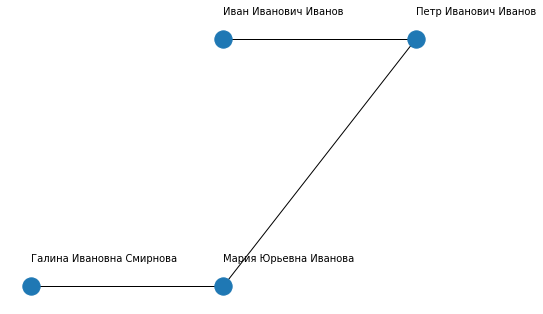

In [2]:
family = {0: 'Иван Иванович Иванов',
          1: 'Мария Юрьевна Иванова',
          2: 'Петр Иванович Иванов',
          3: 'Галина Ивановна Смирнова'}

relations = [(0,2),(1,2),(3,1)]

position = {3:[0,0], 1:[1,0], 0:[1,1], 2:[2,1]}

g = nx.Graph()

g.add_nodes_from(list(family.keys()))
g.add_edges_from(relations)

nx.draw(g, pos=position)

for i, name in family.items():
    plt.text(position[i][0], position[i][1]+0.1, name)

В дереве есть теща (Г.И.Смирнова), супруги Ивановы и сын Петр. Ребро означает отношение "родитель-потомок".

Этот граф можно представить матрицей смежности, в которой будет 1 при отношении "родитель-потомок" и 0 в противоположном случае. Строки и столбцы это вершины графа.

In [3]:
m = np.array([[0,0,1,0],[0,0,1,0],[0,0,0,0],[0,1,0,0]])
m

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0]])

Задачи: 

1. Обогатить граф (увеличить количество узлов до 15)

2. Написать алгоритм, который находит
- все пары "бабушка или дедушка"-"внук или внучка"
- всех прадедушек и прабабушек
- все пары "зять-теща"
- бездетные пары

# Разные примеры networkx

In [ ]:
g = nx.Graph()
g.add_nodes_from([(1, {'color':'red'}),(2),(3),(4)])
g.add_edges_from([(1,2),(3,4)])
nx.draw(g)

In [ ]:
g.nodes()

In [ ]:
g.number_of_edges()

In [ ]:
g.number_of_nodes()

In [ ]:
g.edges

In [ ]:
g.nodes

In [ ]:
g.adj

In [ ]:
g.degree

In [ ]:
g1 = nx.DiGraph()

In [ ]:
g1.add_edge(1,2)
g1.add_edge(2,3)

In [ ]:
nx.draw(g1)

In [ ]:
g = nx.Graph()

In [ ]:
g.add_nodes_from([1,2,3])

In [ ]:
nx.draw(g)

In [ ]:
pos = nx.spring_layout(g, seed=200)
pos

In [ ]:
nx.draw(g, pos={1:(1,1), 2:(2,2), 3:(3,3)})

In [ ]:
g1 = nx.Graph()

places = dict()

input_layer = range(5)
for i, item_ in enumerate(input_layer):
    places[item_] = [0,i]

hidden_layer = range(5,10)
for i, item_ in enumerate(hidden_layer):
    places[item_] = [1,i]

output_layer = range(10,12)
for i, item_ in enumerate(output_layer):
    places[item_] = [2,i]

for edge_ in product(input_layer, hidden_layer):
    g1.add_edge(*edge_)

for edge_ in product(hidden_layer, output_layer):
    g1.add_edge(*edge_)

    

In [ ]:
nx.draw(g1, pos=places, )

In [ ]:
g2 = nx.MultiDiGraph()

In [ ]:
g2.add_edges_from([(1,2),(2,1)])

In [ ]:
nx.draw(g2)

In [ ]:
g3 = nx.barbell_graph(5,2)
nx.draw(g3)

In [ ]:
nx.draw(nx.lollipop_graph(3,3))

In [ ]:
red = nx.random_lobster(10, 0.9, 0.9)

In [ ]:
nx.draw(red)